In [1]:
%load_ext wurlitzer
import numpy as np
import glob
import os
import matplotlib.pyplot as plt
from astropy.io import fits
from xspec import *
plt.rcParams['figure.figsize'] = [9,6]

In [2]:
spec_file = sorted(glob.glob("*grpspec.fits"))
spec = Spectrum(spec_file[0])


1 spectrum  in use
 
Spectral Data File: 0932201101_PN156grpspec.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  7.862e-03 +/- 1.685e-03 (53.5 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-7
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 7423 sec
 Using fit statistic: chi
 Using Background File                0932201101_PN156spec_bkg.fits
  Background Exposure Time: 7421 sec
 Using Response (RMF) File            0932201101_PN156spec.rmf for Source 1
 Using Auxiliary Response (ARF) File  0932201101_PN156spec.arf



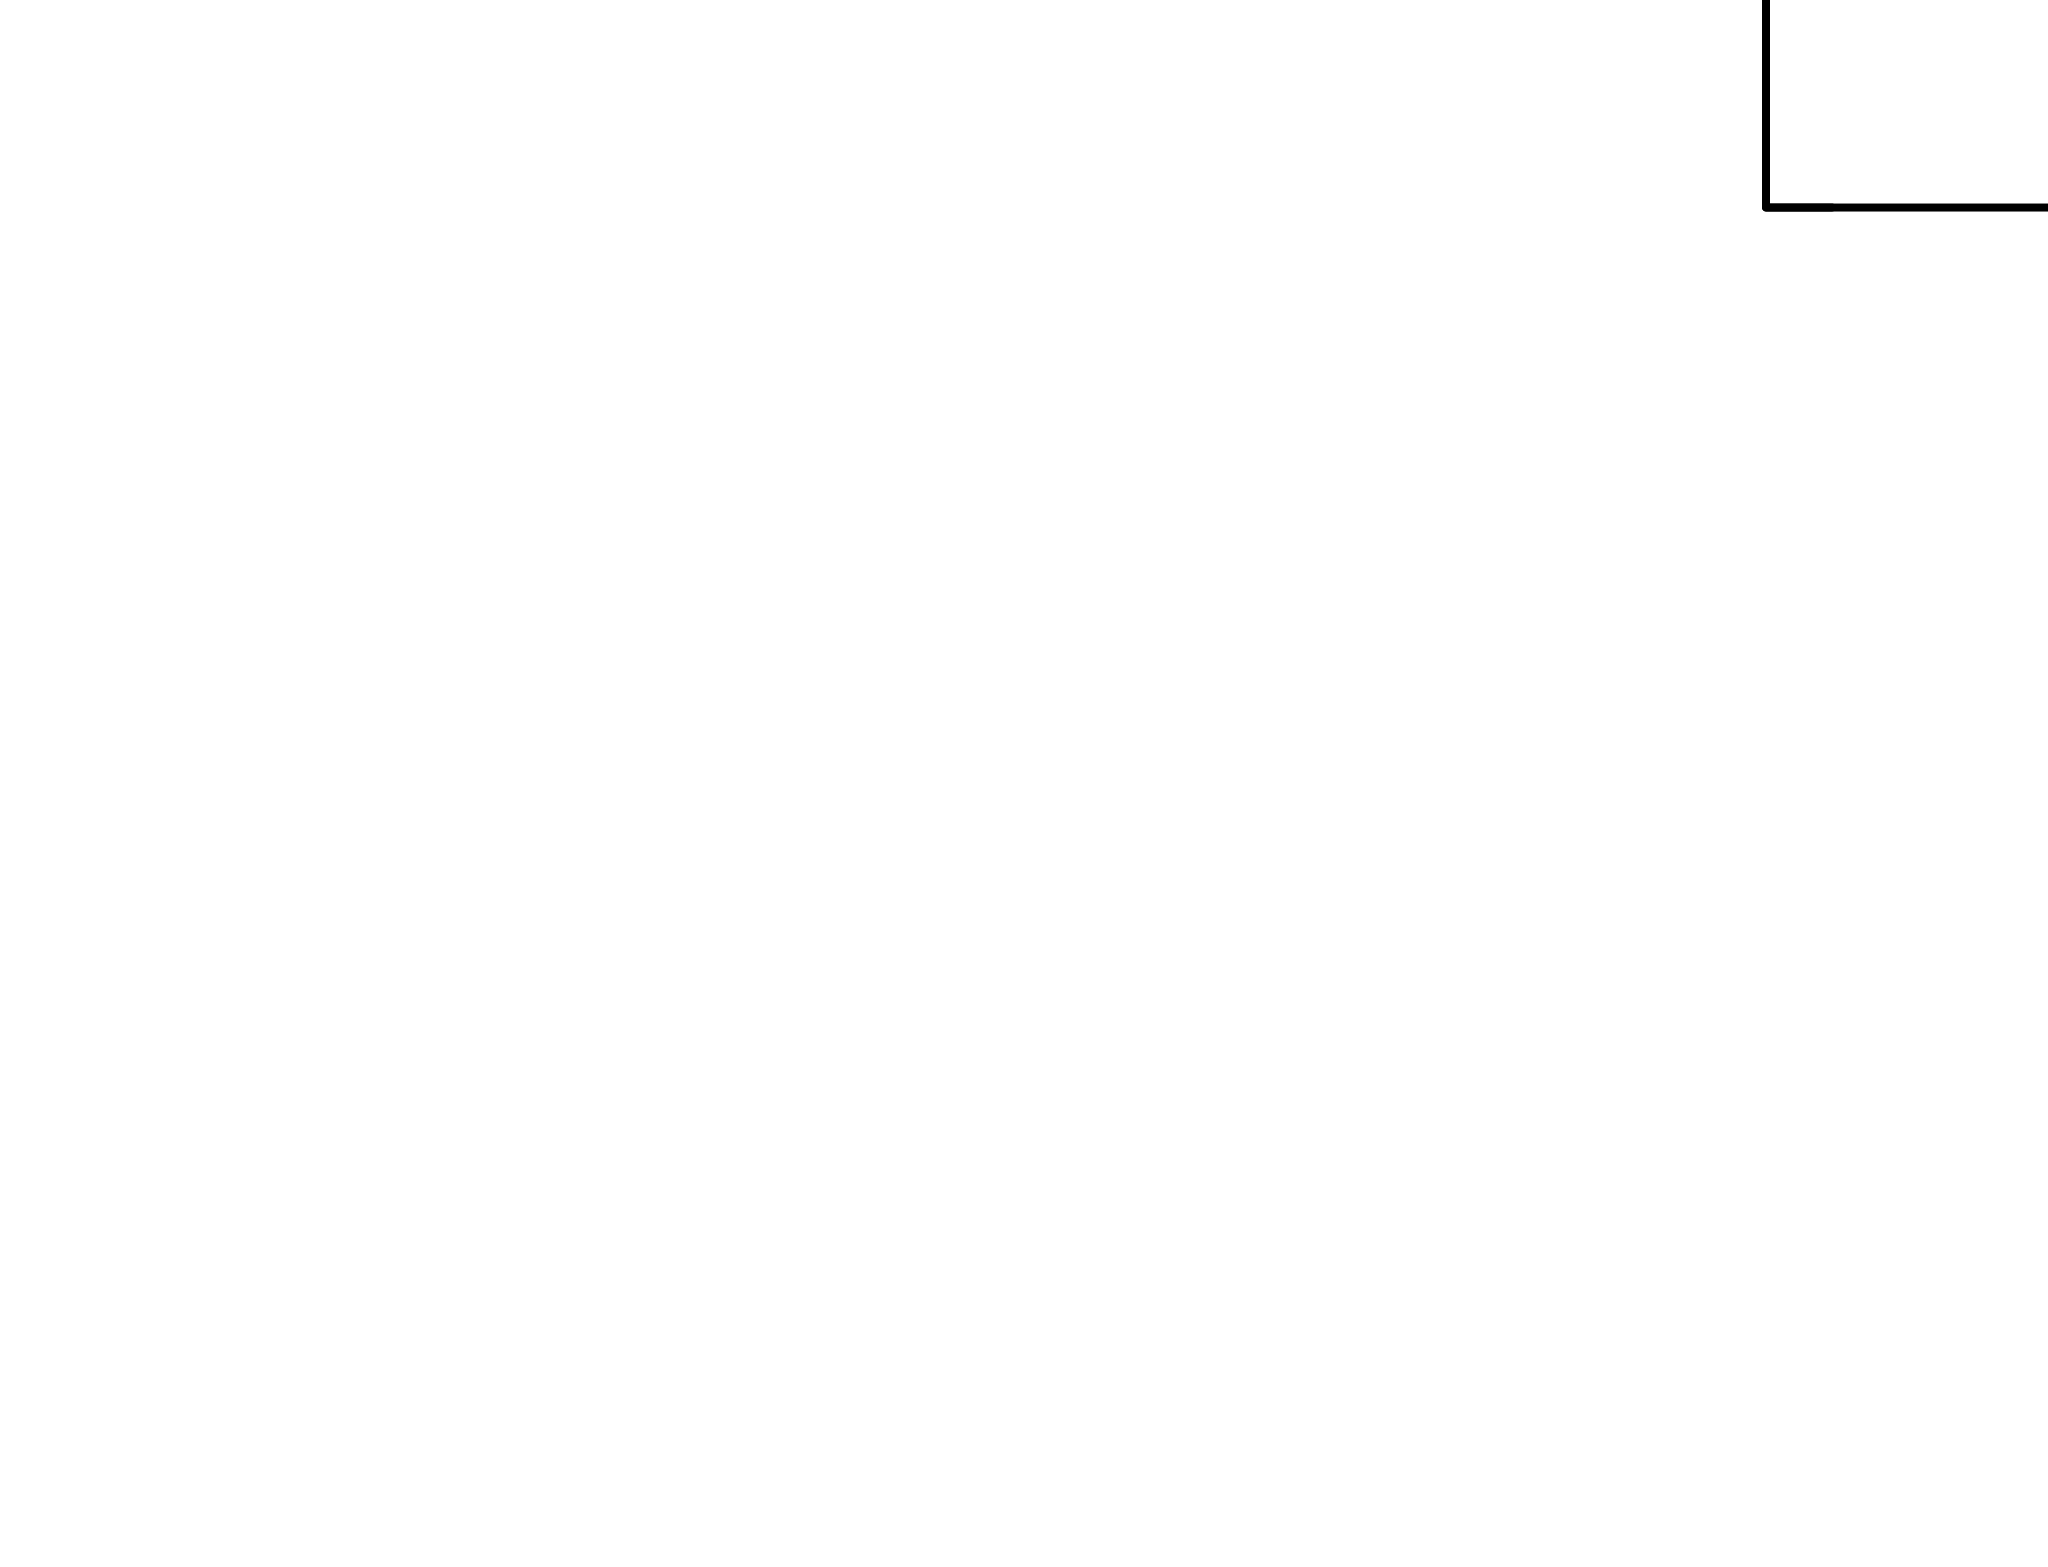

In [3]:
Plot.device ="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.05")
Plot("data")

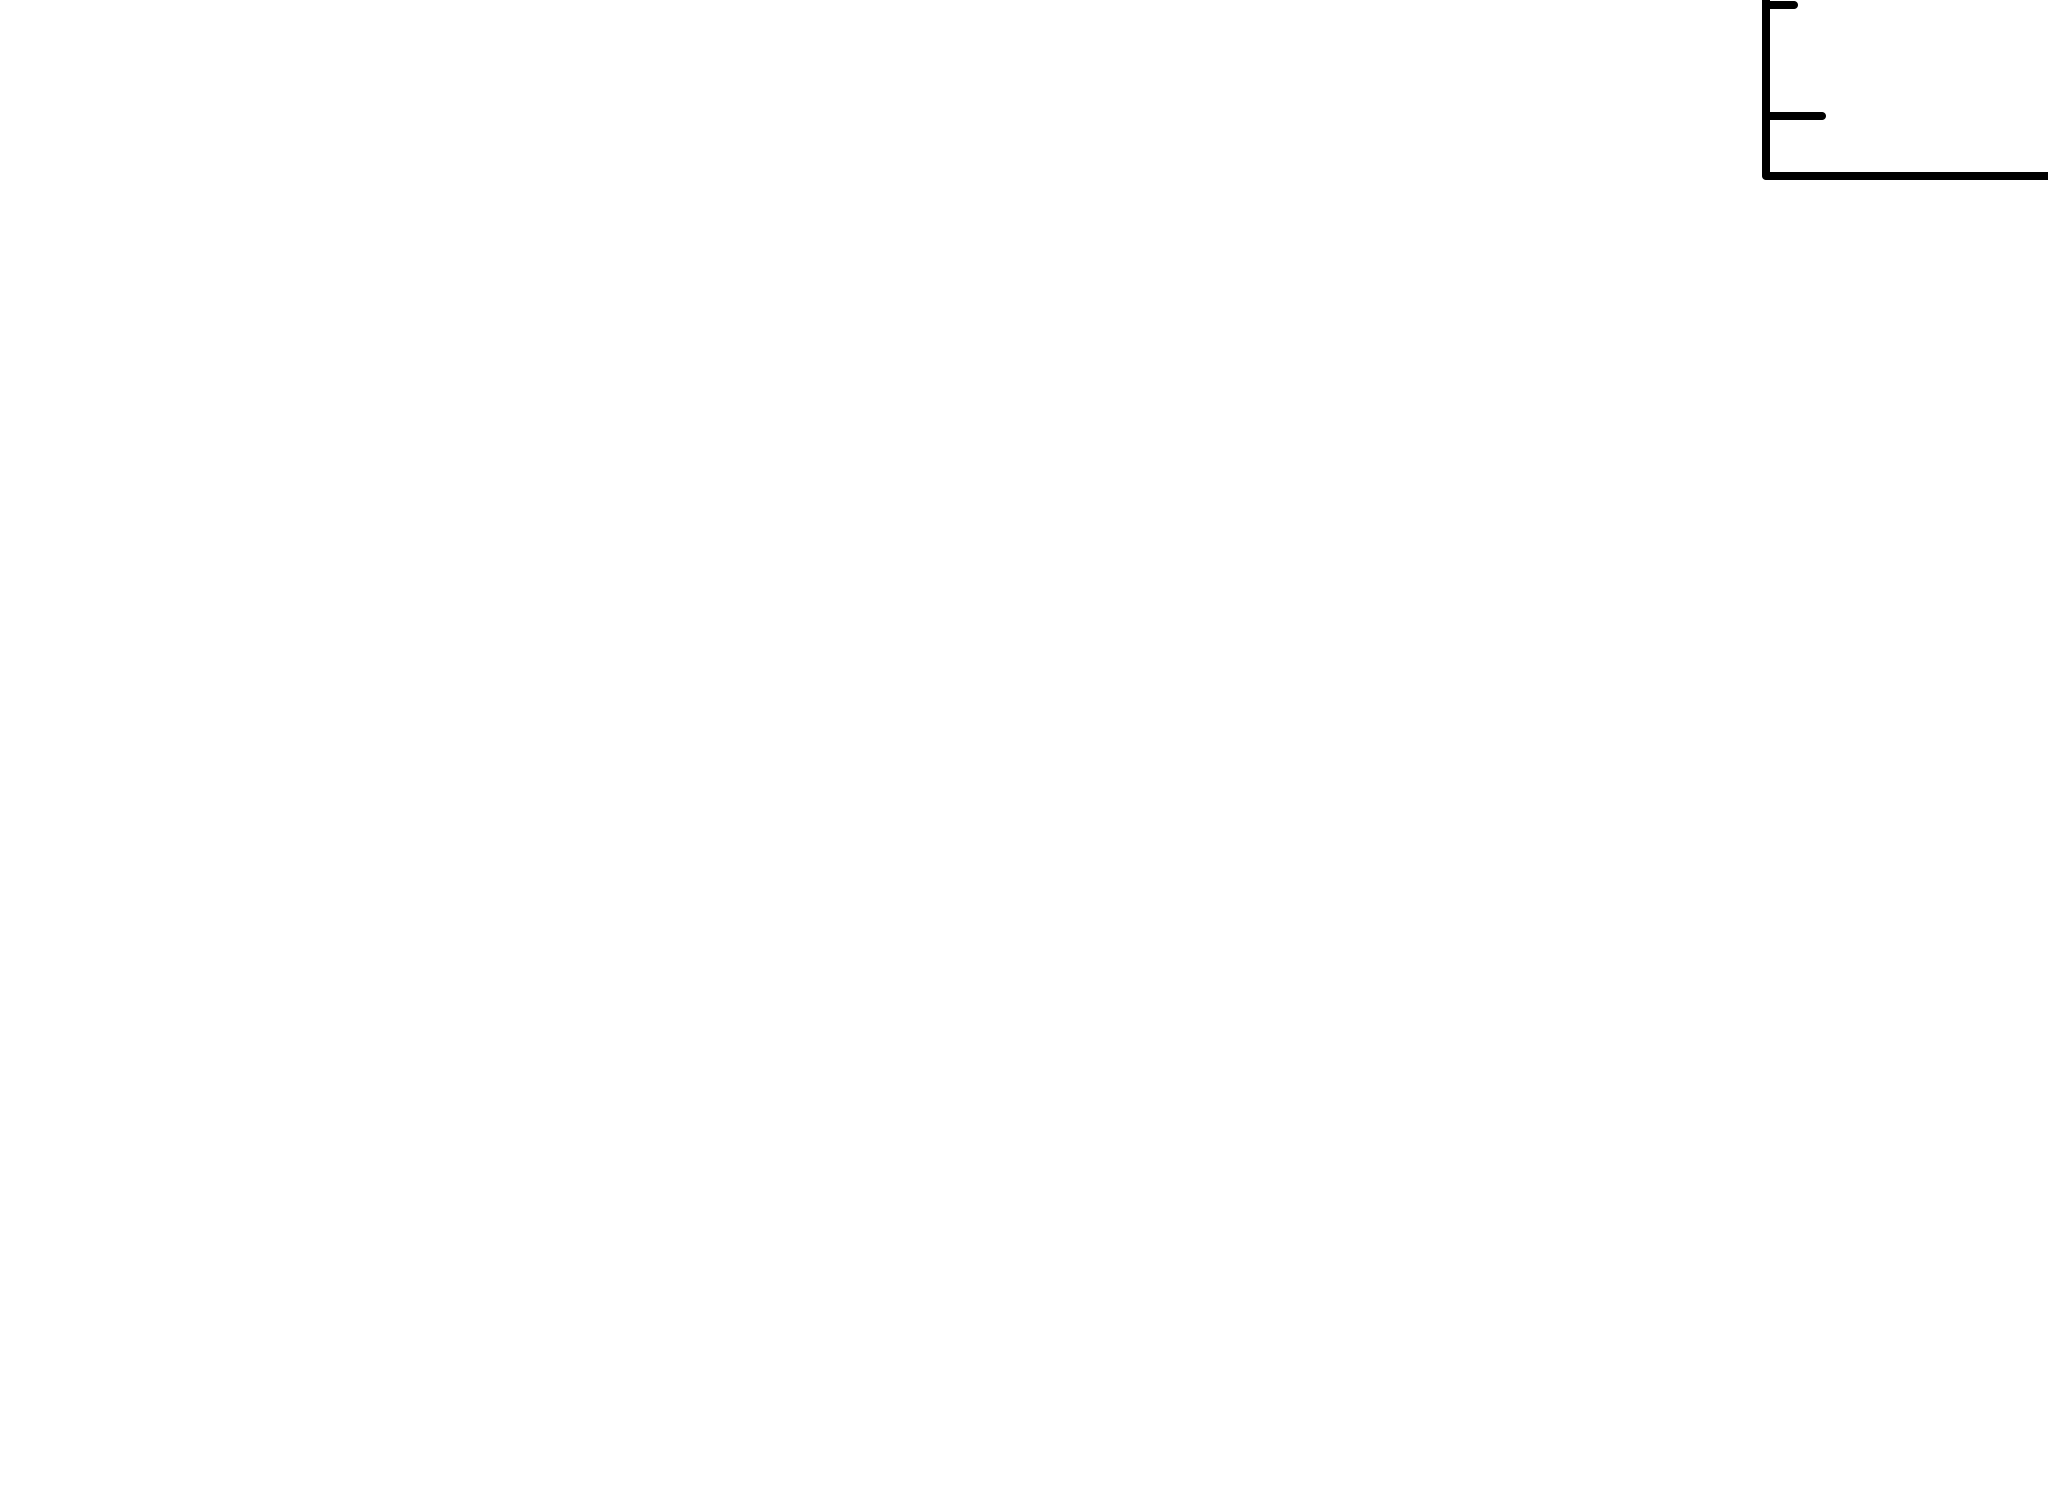

     1 channels (1) ignored in spectrum #     1
     1 channels (7) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross secti

In [4]:
spec.ignore("**-0.2 12.0-**")
AllModels.clear()
mo1 = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")
AllModels.calcFlux("0.2 12.0")